# <font color=blue>USER RETENTION RATE & CHURN RATE STUDY</font>

***
From Ref : https://clearbridgemobile.com/5-methods-for-increasing-app-engagement-user-retention/ <br>
Engagement – describes how active users are on the application. While this is a somewhat subjective metric, Localytics describes highly engaged users as those that have 10+ sessions per month.<br>

Metrics to study:
0. Retention rate and churn rate
1. Session length (time between opening and closing of app)
2. Time interval between two consecuitive sessions
3. Screen flows
4. App crashes
5. Daily uninstalls (new vs exsisting users, android vs ios)
6. Track App Launch to App Launch Retention Cohorts
7. Track Active Users: DAUs (daily Active Users), MAUs (Monthly Active Users), Stickiness = DAU/MAU
8. Track Number of Daily/Monthly Sessions

More references:
https://blog.appsee.com/the-best-metrics-and-tools-for-measuring-user-engagement/ <br>
https://clevertap.com/blog/cohort-analysis-user-retention/

## Load Libraries

In [1]:
#from sklearn import cluster
#from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib as mpl

#from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns

#from sklearn.metrics.cluster import normalized_mutual_info_score
#from sklearn.metrics.cluster import adjusted_rand_score

%matplotlib inline

In [2]:
def label_encoding(df, col_name):
    df[col_name] = c_df[col_name].astype('category')
    df[col_name+"_CAT"] = c_df[col_name].cat.codes
    return


# <font color=green>1. USER RETENTION AND CHURN RATE</font>

For the study I am going to use a sample dataset I found online called chapter-12-relay-foods.csv. <br> It is from reference http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/#2.-Determine-the-user's-cohort-group-(based-on-their-first-order) <br> which is the tutorial I am going to follow to estimate the user retention. <br>

NOTE <br> 
I will add the variables I think we should use from InstaSize dataset in double parenthisis (()) so that it is easy to insert them and study when we get a larger sample dataset. I have run this code on the current InstaSize sample dataset but there aren't enough data to draw a rentetion curve.

## Load the 1000 User Data Set

In [3]:
# Open the data file and read the contents into a dataframe
df=pd.read_csv("../UserData/1000ShareAllColumns.csv",parse_dates=['FIRST_SESSION_DATE'])

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (34,37,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Pre-processing 

#### NOTE - For now I remove NANs. Can we fill those NANs instead with mean values?

In [4]:
# Keep only the ones required for this analysis
keep_col = ['CUSTOMER_ID','CLIENT_DATE','CLIENT_TIME','SESSION_UUID','FIRST_SESSION_DATE']
df = df[keep_col]

In [5]:
df.dtypes

CUSTOMER_ID                   object
CLIENT_DATE                   object
CLIENT_TIME                   object
SESSION_UUID                  object
FIRST_SESSION_DATE    datetime64[ns]
dtype: object

In [6]:
# Find columns with null values
print(df.isnull().sum())

CUSTOMER_ID             0
CLIENT_DATE             0
CLIENT_TIME             0
SESSION_UUID          993
FIRST_SESSION_DATE    400
dtype: int64


In [7]:
#Drop rows with all NAN
c_df = df.dropna(how='all') 
c_df.shape
c_df.dtypes

CUSTOMER_ID                   object
CLIENT_DATE                   object
CLIENT_TIME                   object
SESSION_UUID                  object
FIRST_SESSION_DATE    datetime64[ns]
dtype: object

In [8]:
# Drop columns with all NAN
c_df = c_df.dropna(axis=1,how='all')
c_df.shape
c_df.dtypes

CUSTOMER_ID                   object
CLIENT_DATE                   object
CLIENT_TIME                   object
SESSION_UUID                  object
FIRST_SESSION_DATE    datetime64[ns]
dtype: object

In [9]:
# Drop rows with any NAN
c_df = c_df.dropna(axis=0,how='any')
c_df.shape
c_df.dtypes

CUSTOMER_ID                   object
CLIENT_DATE                   object
CLIENT_TIME                   object
SESSION_UUID                  object
FIRST_SESSION_DATE    datetime64[ns]
dtype: object

In [10]:
# Check to make sure all NAN are removed
print(c_df.isnull().sum())
c_df.dtypes
c_df.dtypes

CUSTOMER_ID           0
CLIENT_DATE           0
CLIENT_TIME           0
SESSION_UUID          0
FIRST_SESSION_DATE    0
dtype: int64


CUSTOMER_ID                   object
CLIENT_DATE                   object
CLIENT_TIME                   object
SESSION_UUID                  object
FIRST_SESSION_DATE    datetime64[ns]
dtype: object

## Cohort Analysis

Reference - http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/ <br>

What is cohort analysis? <br>
A cohort is a group of users who share something in common like their sign-up date, first purchase month, birth date, acquisition channel, etc. Cohort analysis is the method by which these groups are tracked over time, helping us to spot trends, understand repeat behaviors (purchases, engagement, amount spent, etc.), and monitor customer and revenue retention. <br>

### 1. Create a period column and a year column based on the OrderDate ((FIRST_SESSION_DATE))

In [11]:
c_df['FIRST_SESSION_PERIOD'] = c_df.FIRST_SESSION_DATE.apply(lambda x: x.strftime('%Y-%m'))
c_df.shape

(24226, 6)

### 2. Determine the user's cohort group based on their first session


In [12]:
# Create a new column called CohortGroup, which is the year and month in which the user's first started using the app.
c_df.set_index('CUSTOMER_ID', inplace=True)
c_df['COHORT_GROUP'] = c_df.groupby(level=0)['FIRST_SESSION_DATE'].min().apply(lambda x: x.strftime('%Y-%m'))
c_df.reset_index(inplace=True)
c_df.head()

,CUSTOMER_ID,CLIENT_DATE,CLIENT_TIME,SESSION_UUID,FIRST_SESSION_DATE,FIRST_SESSION_PERIOD,COHORT_GROUP
0,7DBF35B6-B2D3-480D-8F96-A20AA406CB48,2018-06-08,2018-06-08 11:43:59+00:00,944646f3f3772a10ad59cd96c7ce908a260f2532,2018-06-08,2018-06,2018-06
1,EC6077AE-58BC-404C-8A24-935CE4C0A73B,2018-06-08,2018-06-08 05:49:22+00:00,6aa3c995a681e627fb1bd5c5cccade574f8babc4,2018-06-08,2018-06,2018-06
2,1AEB1B55-5A6C-4ED6-86CD-6003899D1261,2018-06-08,2018-06-08 06:24:18+00:00,573009dd9c2f3fa75f0ff6f2babab76fc4f27f91,2018-06-08,2018-06,2018-06
3,EB109314-8AC8-405E-9F55-57BA6BF5B414,2018-06-08,2018-06-08 06:57:06+00:00,45b887a48845fdacc3f8088ea3c8f75acadeeb16,2018-06-08,2018-06,2018-06
4,7DBF35B6-B2D3-480D-8F96-A20AA406CB48,2018-06-08,2018-06-08 11:40:37+00:00,944646f3f3772a10ad59cd96c7ce908a260f2532,2018-06-08,2018-06,2018-06


### 3. Rollup data by COHORT_GROUP & FIRST_SESSION_DATE

In [13]:
grouped = c_df.groupby(['COHORT_GROUP', 'FIRST_SESSION_PERIOD'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'CUSTOMER_ID': pd.Series.nunique,'SESSION_UUID': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'CUSTOMER_ID': 'TOTAL_CUSTOMERS', 'SESSION_UUID': 'TOTAL_SESSIONS'}, inplace=True)

cohorts


,,TOTAL_CUSTOMERS,TOTAL_SESSIONS
COHORT_GROUP,FIRST_SESSION_PERIOD,,
2018-05,2018-05,2,1
2018-06,2018-06,753,1375
2018-07,2018-07,266,695


### 4. Label the COHORT_GROUP for each Cohort


In [14]:
# Check how each cohort has behaved in the months following their first session.
# This allows us to compare cohorts across various stages of their lifetime.
# To do this we need to index each cohort to their first session month. 
def cohort_period(df):
    df['COHORT_PERIOD'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts


,,TOTAL_CUSTOMERS,TOTAL_SESSIONS,COHORT_PERIOD
COHORT_GROUP,FIRST_SESSION_PERIOD,,,
2018-05,2018-05,2,1,1
2018-06,2018-06,753,1375,1
2018-07,2018-07,266,695,1


## User Retention by COHORT_GROUP

In [15]:
# We look at the percentage change of each CohortGroup over time 

# reindex the DataFrame
cohorts.reset_index(inplace=True)

cohorts.set_index(['COHORT_GROUP', 'COHORT_PERIOD'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TOTAL_CUSTOMERS'].groupby(level=0).first()

cohort_group_size.head()


COHORT_GROUP
2018-05      2
2018-06    753
2018-07    266
Name: TOTAL_CUSTOMERS, dtype: int64

In [16]:
# Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. 
# Since DataFrame operations are performed based on the indices of the objects, we'll use unstack 
# on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and 
# each row is the CohortPeriod corresponding to that group.

cohorts['TOTAL_CUSTOMERS'].unstack(0).head()


COHORT_GROUP,2018-05,2018-06,2018-07
COHORT_PERIOD,,,
1,2,753,266


In [17]:
# Now utilize broadcasting to divide each column by the corresponding cohort_group_size.

user_retention = cohorts['TOTAL_CUSTOMERS'].unstack(0).divide(cohort_group_size, axis=1)
user_retention


COHORT_GROUP,2018-05,2018-06,2018-07
COHORT_PERIOD,,,
1,1,1,1


## Visualizations

### Retention Rate Trend 

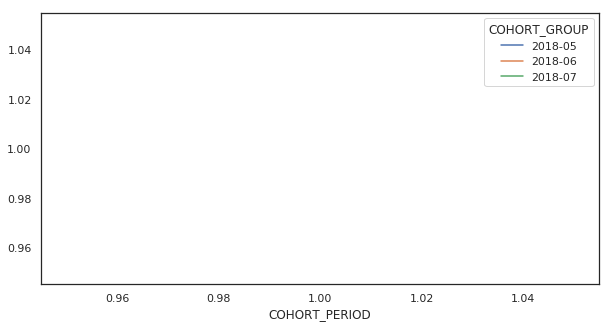

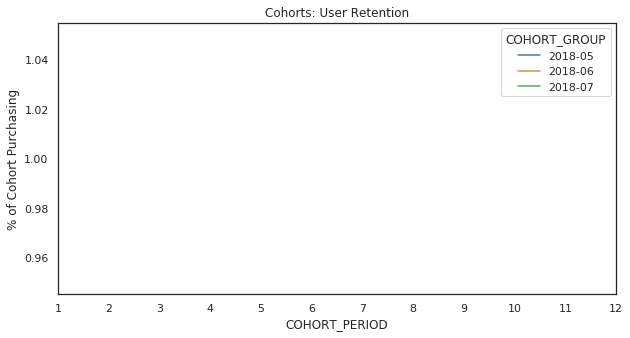

In [22]:
# Plot the cohorts over time in an effort to spot behavioral differences or similarities.
user_retention[['2018-05','2018-06', '2018-07']].plot(figsize=(10,5))
user_retention.plot(figsize=(10,5))

plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
#plt.ylabel('% of Active users');
#plt.xlabel('Months following first session');
plt.ylabel('% of Cohort Purchasing');

### Retention Table

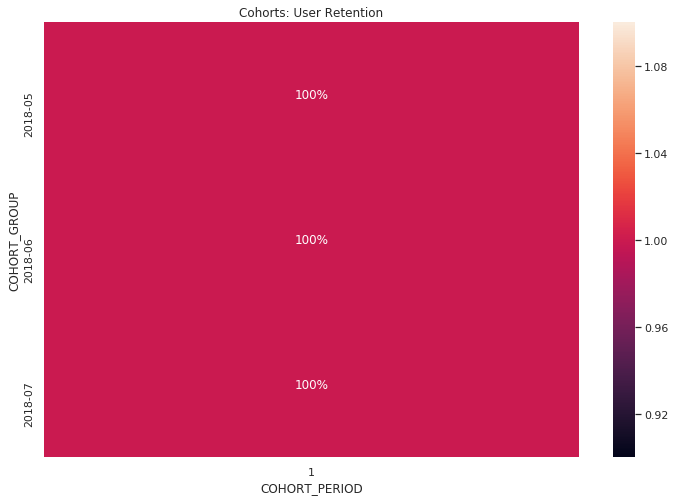

In [19]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### Monthly Retention or the percent of users who return to the app one month, two months, and three months after the app is downloaded.


In [20]:
# To estimate this take the average for each of the cohorts in period 1, 2 and 3 seperately.
# Seperate years 2009 and 2010
monthly_retention = user_retention.groupby(user_retention.columns.str.split("-").str[0],axis=1).mean()
monthly_retention.head()

COHORT_GROUP,2018
COHORT_PERIOD,
1,1


In [23]:
# Select all cases where CohortPeriod < 4
list(monthly_retention.index)
select_indices = list(np.where(monthly_retention[""] == True)[0])


KeyError: ''

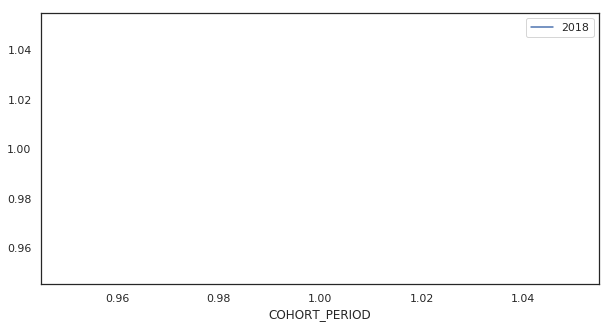

In [25]:
monthly_retention.plot(y='2018', use_index=True, figsize=(10,5))


TypeError: float() argument must be a string or a number

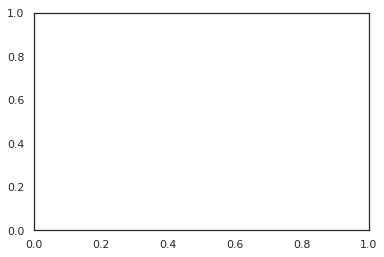

In [26]:
# create plot
n_groups = len(monthly_retention.columns)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, monthly_retention, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 

 
plt.tight_layout()
plt.show()
